In [73]:
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [75]:
sns.set_theme()

In [76]:
import os
import json

In [80]:
results_root = '/home/kwatchar3/bss_spatial_eval/results/bandstop-3rdoct'

ddfs = os.listdir(results_root)
print(ddfs)


dfs = []

for d in ddfs:
    if 'results-ok.csv' in os.listdir(os.path.join(results_root, d)):
        df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    else:
        continue
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
    # print(args.get('estim_filter_kwargs'))
    if args['estim_filter_kwargs']:
        df['cutoff'] = args['estim_filter_kwargs']['Wn'][0] * np.power(2, 1/12)
    else:
        df['cutoff'] = 8000
    dfs.append(df)

df = pd.concat(dfs)
# df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 

# df = df[df['cutoff'] <= 4000]

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

['20221128014720', '20221128015239', '20221128011336', '20221128010601', '20221128010539', '20221128010809', '20221128015441', '20221128010746', '20221128010553', '20221128011724', '20221128010515']


In [81]:
df

,Unnamed: 0,spr/num,sfr/num,cost,true_angle,est_angle,est_deviation,file,cutoff
0,0,8.327105,12.561983,3.619744e+00,0.0,-45.0,-45.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,943.874313
1,1,11.716634,12.561187,3.620380e+00,0.0,-30.0,-30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,943.874313
2,2,17.206252,12.562004,3.619734e+00,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,943.874313
3,3,25.491039,12.561992,3.619743e+00,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,943.874313
4,4,17.206252,12.562004,3.619734e+00,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,943.874313
...,...,...,...,...,...,...,...,...,...
443,443,17.667430,253.246799,3.940217e-24,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,8000.000000
444,444,310.243436,310.243436,0.000000e+00,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,8000.000000
445,445,17.667430,254.274337,3.110205e-24,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,8000.000000
446,446,11.665447,244.533999,2.929167e-23,0.0,30.0,30.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,8000.000000


In [82]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(df.cutoff.min(), df.cutoff.max()), cmap=palette), 
        ax=ax, label='cutoff frequency (Hz)', 
        pad=0.01, aspect=30, 
        ticks=[31.25, 62.5, 125, 250, 500, 1000, 2000, 4000],
        format=lambda v, t: f"{int(v//1000)}k" if v >= 1000 else str(v)
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

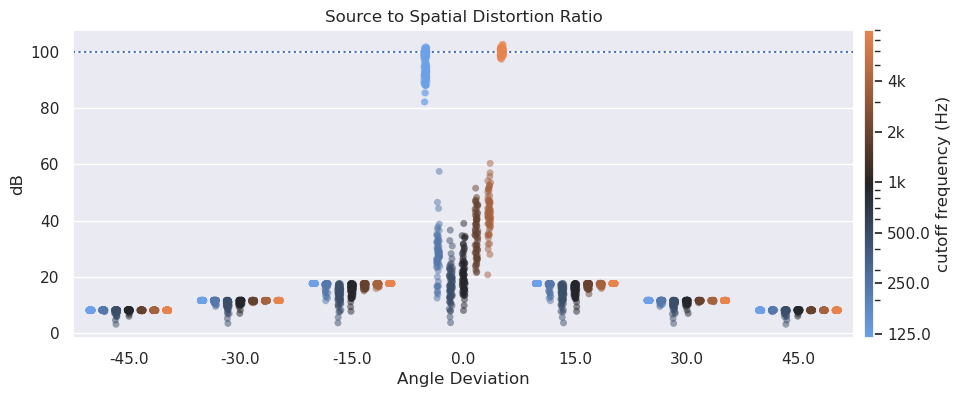

In [83]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))
 
line = 100 #np.percentile(df['spr/numx'].values, 0.99)
    
df['spr/numx'] = df['spr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)
    
ax = sns.stripplot(df,  y='spr/numx', x='est_deviation', hue='cutoff', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(df.cutoff.min(), df.cutoff.max()))
ax.set(ylabel='dB', title='Source to Spatial Distortion Ratio', xlabel='Angle Deviation')

set_axes(fig, ax, line)
plt.show()

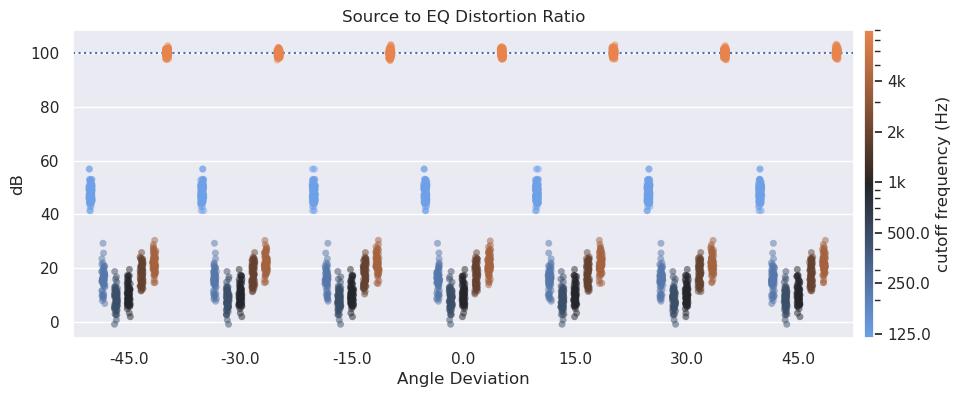

In [84]:
# ax = sns.scatterplot(df[~(df['filt'].str.contains('no'))], x='est_deviation_j', y='sfr/num', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))

line = 100

df['sfr/numx'] = df['sfr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

ax = sns.stripplot(df,  y='sfr/numx', x='est_deviation', hue='cutoff', palette=palette, ax=ax, alpha=0.5, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='dB', title='Source to EQ Distortion Ratio', xlabel='Angle Deviation')
set_axes(fig, ax, line)
plt.show()

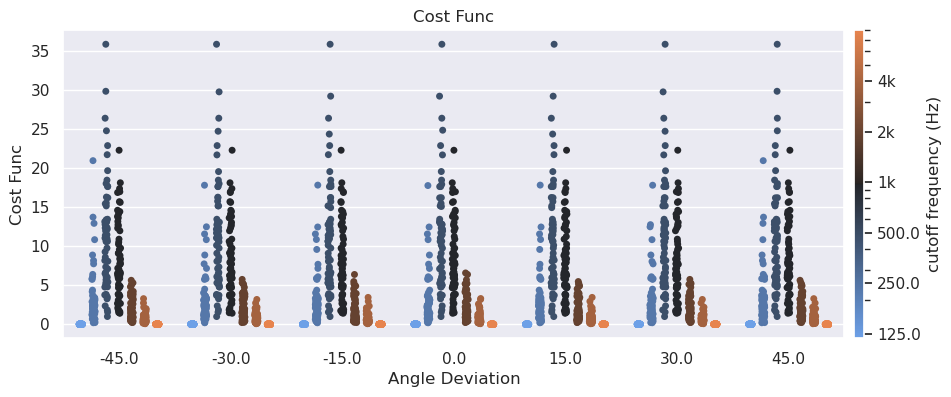

In [85]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='cutoff', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
set_axes(fig, ax, line=False)
plt.show()